In [12]:
# Import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [13]:
# Load dataset
df = pd.read_csv('USA_Housing.csv')

In [14]:
# Display basic dataset info
print(df.head())  # Show first few rows
print(df.info())  # Dataset structure
print(df.describe())  # Summary statistics
print(df.columns)  # Column names

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Eli

C:\Users\2327238\AppData\Local\Temp\ipykernel_7804\245560642.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])  # Distribution of house prices


<Axes: xlabel='Price', ylabel='Count'>

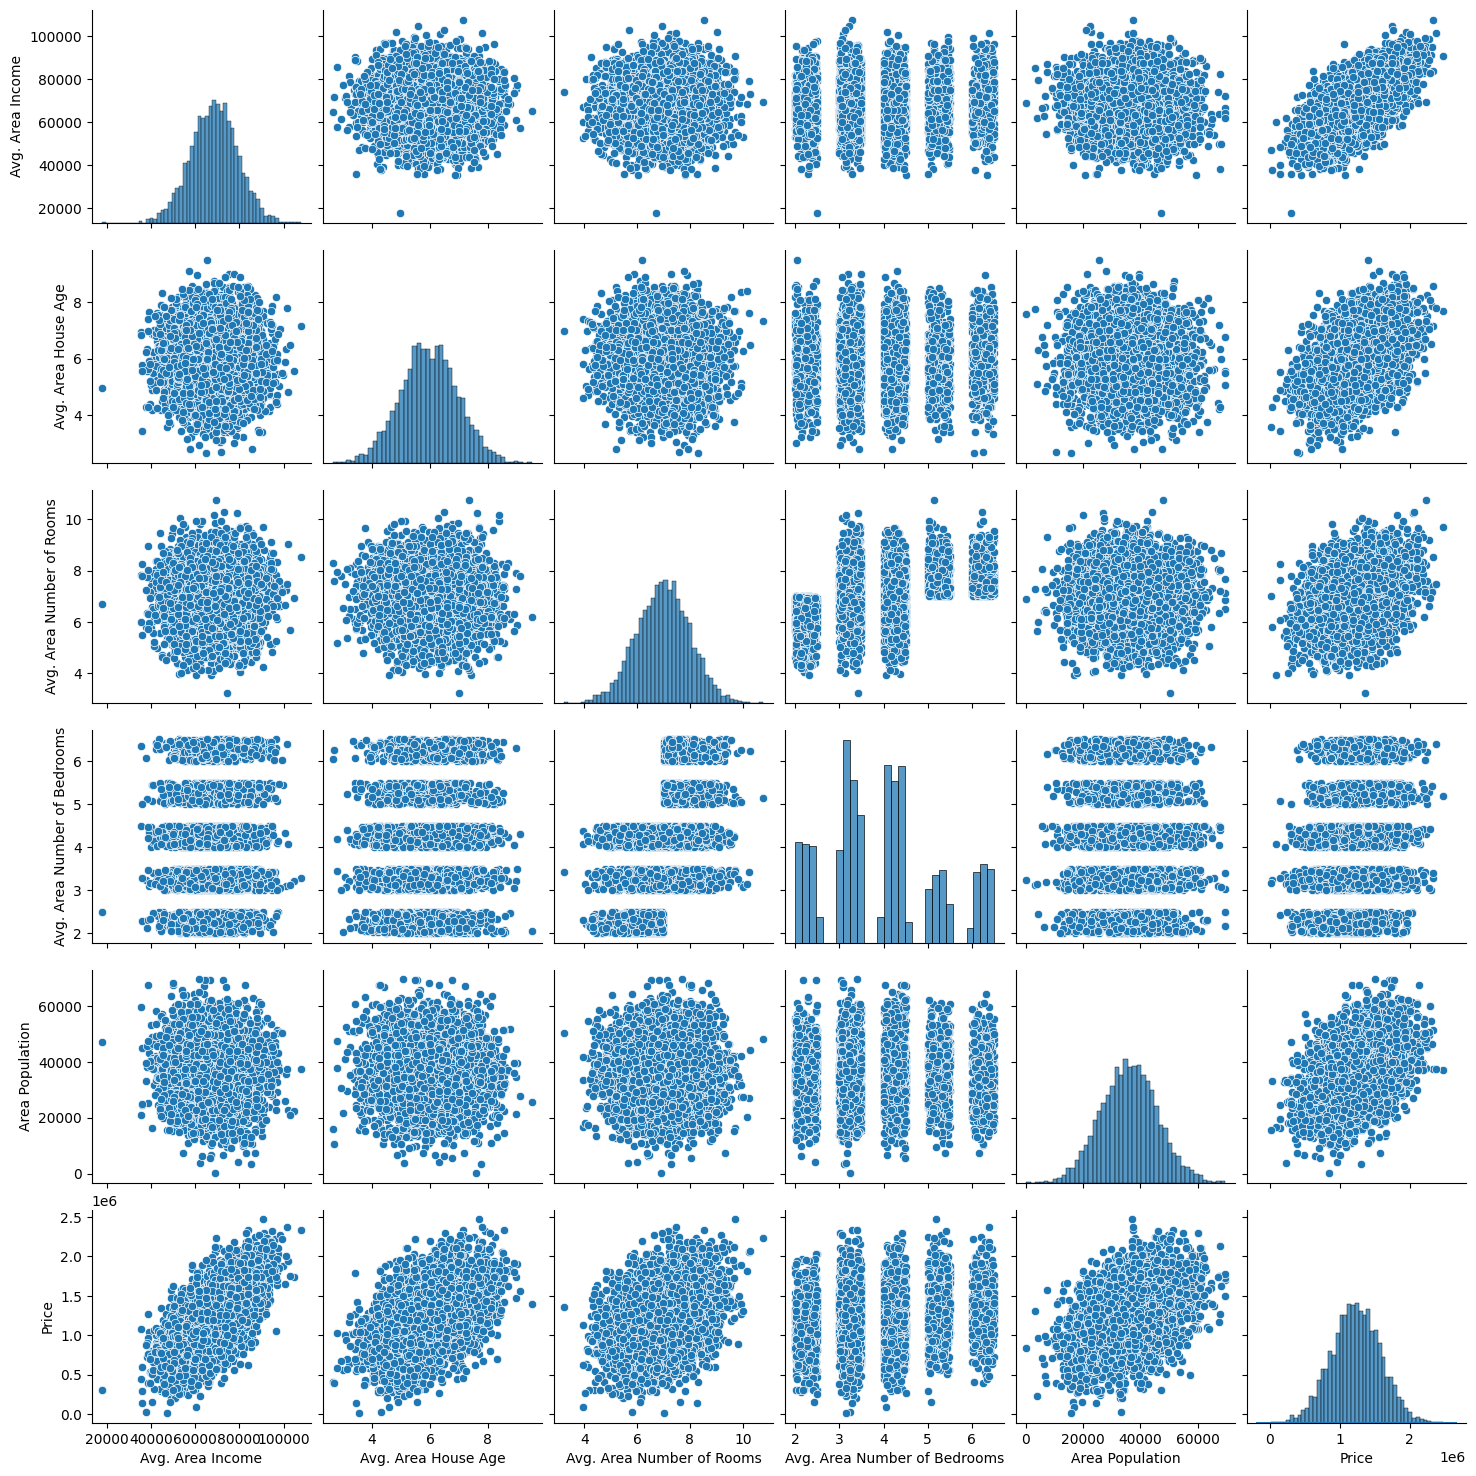

In [15]:
# Visualizing relationships
sns.pairplot(df)  # Pairwise scatter plots
sns.distplot(df['Price'])  # Distribution of house prices

<Axes: >

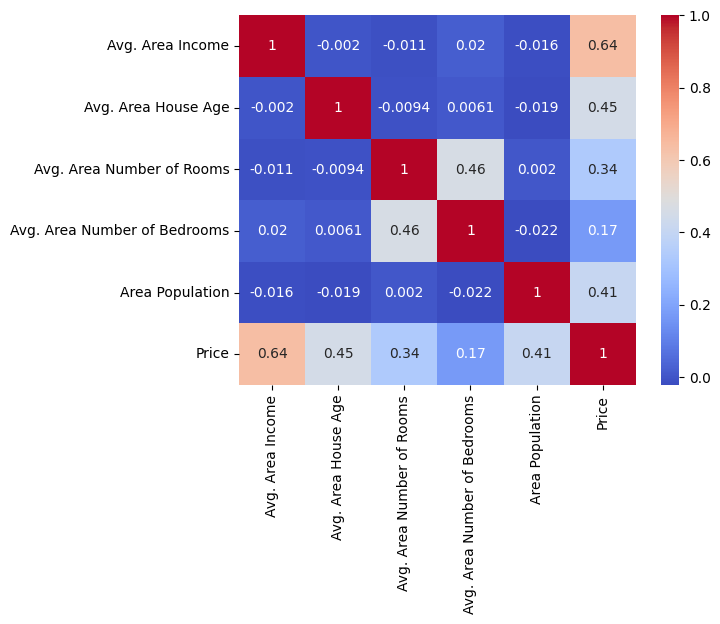

In [16]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')  # Correlation heatmap

In [17]:
# Define features (X) and target variable (y)
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
        'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

In [18]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [19]:
# Initialize and train the Linear Regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [20]:
# Model parameters
print("Intercept:", lm.intercept_)
print("Coefficients:", lm.coef_)

Intercept: -2640159.796852963
Coefficients: [2.15282755e+01 1.64883282e+05 1.22368678e+05 2.23380186e+03
 1.51504200e+01]


In [21]:
# Create a DataFrame for coefficients
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
print(cdf)

                                      Coeff
Avg. Area Income                  21.528276
Avg. Area House Age           164883.282027
Avg. Area Number of Rooms     122368.678027
Avg. Area Number of Bedrooms    2233.801864
Area Population                   15.150420


In [22]:

# Predictions on test set
predictions = lm.predict(X_test)

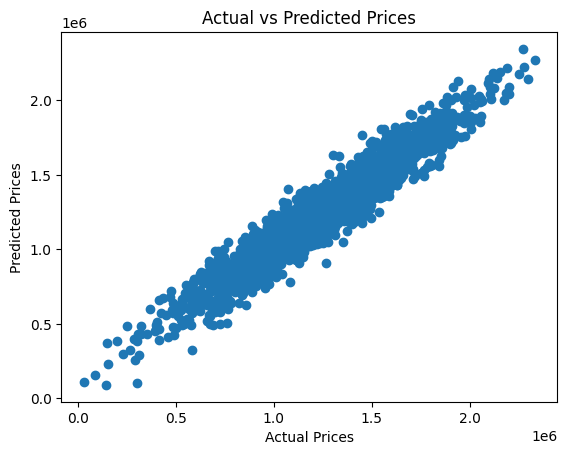

In [23]:
# Evaluate the model (Optional: Add performance metrics)
plt.scatter(y_test, predictions)  # Compare actual vs predicted prices
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()